# EJERCICIOS

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,confusion_matrix
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict,cross_val_score,cross_validate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score,make_scorer,classification_report
from scipy.stats import reciprocal
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

## EJERCICIO 1

Vamos a trabajar con el siguiente conjunto de datos: https://www.datacamp.com/es/datalab/datasets/dataset-python-loans

| Variable      	| Explicación                                                                                                             |
|-------------------|-------------------------------------------------------------------------------------------------------------------------|
| credit_policy	    | 1 si el cliente cumple con los criterios de suscripción de crédito; 0 en caso contrario.                                |
| purpose	        | El propósito del préstamo.                                                                                              |
| int_rate	        | La tasa de interés del préstamo (a los prestatarios más riesgosos se les asignan tasas más altas).                      |
| installment	    | Las cuotas mensuales del prestamo                                                                                       |
| log_annual_inc    | El logaritmo natural del ingreso anual declarado por el prestatario.                                                    |
| dti	            | La relación deuda-ingreso del prestatario (monto de deuda dividido por ingresos anuales).                               |
| fico	            | El puntaje de crédito FICO del prestatario.                                                                             |
| days_with_cr_line	| El número de días que el prestatario ha tenido una línea de crédito.                                                    |
| revol_bal	        | El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta).                    |
| revol_util        | La tasa de utilización de la línea de crédito del prestatario (monto de crédito utilizado respecto al total disponible).|
| inq_last_6mths	| El número de consultas de los acreedores al prestatario en los últimos 6 meses.                                         |
| delinq_2yrs	    | El número de veces que el prestatario ha estado más de 30 días en mora en un pago en los últimos 2 años.                |
| pub_rec	        | El número de registros públicos despectivos del prestatario.                                                            |
| not_fully_paid    | 1 si el préstamo se pagó totalmente; 0 en caso contrario.                                                        |

El csv lo tienes disponible en Moodle

Este conjunto de datos consta de más de 9500 préstamos con información sobre los datos del préstamo y si el préstamo fue pagado en su totalidad o no. Estos datos fueron extraídos de LendingClub.com
Crea un clasificador para predecir si un prestamo va a ser pagado o no.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [84]:
loan_data = pd.read_csv("datos/loan_data.csv")

#### EXPLORAR LOS DATOS

Entre otras cosas: estadísticas, matriz de correlaciones y borrar columnas innecesarias.

In [85]:
df_prestamos=pd.DataFrame(loan_data)
df_prestamos.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [86]:
df_prestamos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [87]:
df_prestamos.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [88]:
corr_matrix = df_prestamos.corr(numeric_only=True)
corr_matrix["not.fully.paid"].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

In [89]:
corr_matrix.style.background_gradient()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [90]:
columns_to_drop = ["delinq.2yrs","days.with.cr.line","log.annual.inc","dti"]
df_prestamos_dropped=df_prestamos.drop(columns=columns_to_drop)
df_prestamos_dropped.head()

,credit.policy,purpose,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,737,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,707,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,682,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,712,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,667,4740,39.5,0,0,0


#### DIVIDIR LOS DATOS

In [91]:
strat_train_set, strat_test_set = train_test_split(df_prestamos_dropped, test_size=0.15, stratify=df_prestamos_dropped["not.fully.paid"], random_state=42)
strat_test_set["not.fully.paid"].value_counts() / len(strat_test_set)

not.fully.paid
0    0.839944
1    0.160056
Name: count, dtype: float64

#### PREPARAR LOS DATOS

In [92]:
number_attributes=['credit.policy', 'int.rate','installment','fico','revol.bal','revol.util','inq.last.6mths','pub.rec']

number_pipeline=make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)
purpose_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder()
)

preprocessing = ColumnTransformer([
    ("purpose_transform", purpose_pipeline, ["purpose"]),
    ("number_transform", number_pipeline,number_attributes)
    ],verbose_feature_names_out = False)

In [93]:
prestamos_prepared = preprocessing.fit_transform(strat_test_set)
preprocessing.get_feature_names_out()

array(['purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'credit.policy', 'int.rate',
       'installment', 'fico', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'pub.rec'], dtype=object)

In [94]:
prestamos_prepared_fr = pd.DataFrame(
    prestamos_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=strat_test_set.index)
prestamos_prepared_fr

,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,credit.policy,int.rate,installment,fico,revol.bal,revol.util,inq.last.6mths,pub.rec
4262,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.501739,-1.201065,0.929871,1.598462,1.830480,-0.616098,-0.678530,-0.22587
8111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.993068,-0.188597,-1.343772,-1.008200,-0.324684,1.322133,0.960894,-0.22587
110,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.501739,-0.600139,-0.380078,0.034465,0.722872,1.085933,-0.268674,-0.22587
1581,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.501739,0.292143,1.727795,-0.486867,-0.316879,0.165447,-0.678530,-0.22587
3136,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.501739,0.681834,2.600453,-0.095868,1.776609,-0.053385,0.141182,-0.22587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.501739,2.633930,0.330562,-1.268866,-0.292013,-0.084647,0.141182,-0.22587
2133,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.501739,0.219304,0.425253,0.555798,-0.146514,-0.456315,0.551038,-0.22587
6620,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.501739,-0.276004,0.070678,0.295131,-0.346534,-0.946083,0.141182,-0.22587
6089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.501739,0.230230,0.102659,-0.356534,0.180644,0.721212,-0.678530,-0.22587


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos:
- Regresión logisitca
- SGDClassifier
- K vecinos mas cercanos
- Random Forest

 y evalua los resultados en el conjunto de entrenamiento con las siguientes métricas: exactitud, prescisión, sensibilidad, f1, curva de roc y área bajo la curva de roc

In [95]:
X_train = strat_train_set.drop("not.fully.paid", axis=1)
y_train = strat_train_set["not.fully.paid"]

X_test = strat_test_set.drop("not.fully.paid", axis=1)
y_test = strat_test_set["not.fully.paid"]

#### REGRESION LOGISTICA

In [96]:
log_reg = make_pipeline(preprocessing, LogisticRegression())
log_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('purpose_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['purpose']),
                                                 ('number_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['credit.policy', 'int.rate',
                                                   'installment', 'fico',
                                                   'revol.bal', 'revol.util',
                                                   'inq.last.6mths',
                                                   'pub.rec'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression())])

EVALUACIÓN CRUZADA

In [97]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Aplicar la evaluación cruzada
cv_results = cross_validate(log_reg, X_train, y_train, cv=5, scoring=scoring)

# Mostrar los resultados promedio de cada métrica
for metric, scores in cv_results.items():
    if 'test' in metric:  # Filtrar métricas de prueba
        print(f"{metric}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

test_accuracy: 0.8397 ± 0.0024
test_precision: 0.4854 ± 0.1410
test_recall: 0.0215 ± 0.0112
test_f1: 0.0408 ± 0.0208


EXACTITUD

In [98]:
cross_val_score(log_reg, X_train, y_train, cv=3, scoring="accuracy")

array([0.83603537, 0.84266765, 0.84187247])

MATRIZ DE CONFUSION

In [99]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3)
cm = confusion_matrix(y_train, y_train_pred)
cm


array([[6809,   29],
       [1272,   31]])

PRECISION Y SENSIBILIDAD

In [100]:
precision=precision_score(y_train, y_train_pred)
precision

0.5166666666666667

In [101]:
sensibilidad=recall_score(y_train, y_train_pred)
sensibilidad

0.023791250959324637

F1

In [102]:
f1=f1_score(y_train, y_train_pred)
f1

0.04548789435069699

CURVA DE ROC

In [103]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=3, method="decision_function")
fpr, tpr, _ = roc_curve(y_train, y_train_pred)

ÁREA BAJO LA CURVA DE ROC

In [104]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6655312273496692

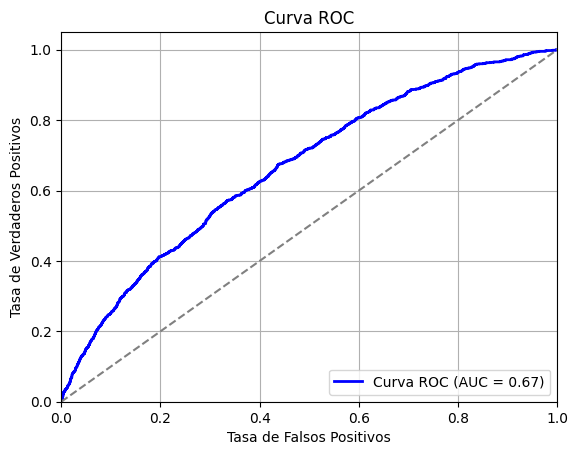

In [105]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [106]:
print(f"La sensibilidad es: {sensibilidad}")
print(f"La precision es: {precision}")
print(f"La f1 es: {f1}")
print(f"El area bajo la curva de roc es: {roc_auc}")

La sensibilidad es: 0.023791250959324637
La precision es: 0.5166666666666667
La f1 es: 0.04548789435069699
El area bajo la curva de roc es: 0.6655312273496692


#### CLASIFICADOR DE DESCENSO DE GRADIANTES ESTOCÁSTICO (SGDC)

In [107]:
X_train = strat_train_set.drop("not.fully.paid", axis=1)
y_train = strat_train_set["not.fully.paid"]

X_test = strat_test_set.drop("not.fully.paid", axis=1)
y_test = strat_test_set["not.fully.paid"]

In [108]:
sgd_clf =make_pipeline(preprocessing, SGDClassifier(random_state=42))
sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('purpose_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['purpose']),
                                                 ('number_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['credit.policy', 'int.rate',
                                                   'installment', 'fico',
                                                   'revol.bal', 'revol.util',
                                                   'inq.last.6mths',
                                                   'pub.rec'])],
                                   verbose_feature_names_out=False)),
                ('sgdclassifier', SGDClassifier(random_state=42))])

EVALUACION CRUZADA

In [109]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.83787767, 0.83898305, 0.8389237 ])

PRECISION

In [110]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
precision=precision_score(y_train, y_train_pred)

SENSIBILIDAD

In [111]:
sensibilidad=recall_score(y_train, y_train_pred)
sensibilidad

0.0023023791250959325

F1

In [112]:
f1=f1_score(y_train, y_train_pred)
f1

0.004545454545454545

CURVA DE ROC

In [113]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")
fpr, tpr, _ = roc_curve(y_train, y_train_pred)

ÁREA BAJO LA CURVA DE ROC

In [114]:
roc_auc = auc(fpr, tpr)
roc_auc

0.5767186978460174

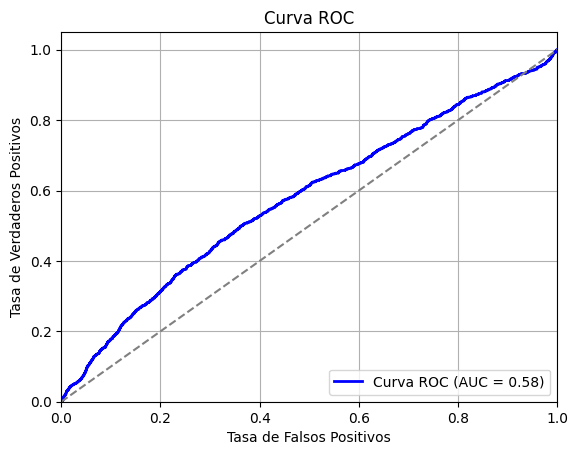

In [115]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [116]:
print(f"La sensibilidad es: {sensibilidad}")
print(f"La precision es: {precision}")
print(f"La f1 es: {f1}")
print(f"El area bajo la curva de roc es: {roc_auc}")

La sensibilidad es: 0.0023023791250959325
La precision es: 0.17647058823529413
La f1 es: 0.004545454545454545
El area bajo la curva de roc es: 0.5767186978460174


#### RANDOM FOREST CLASSIFIER

In [117]:
X_train = strat_train_set.drop("not.fully.paid", axis=1)
y_train = strat_train_set["not.fully.paid"]

X_test = strat_test_set.drop("not.fully.paid", axis=1)
y_test = strat_test_set["not.fully.paid"]

In [118]:
forest_clf =make_pipeline(preprocessing, RandomForestClassifier(random_state=42))
forest_clf.fit(X_train,y_train)
y_train_forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

EVALUACION CRUZADA

In [119]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.83492999, 0.83456153, 0.83708072])

PRECISION

In [120]:
precision=precision_score(y_train, y_train_forest_pred)
precision

0.3448275862068966

SENSIBILIDAD

In [121]:
sensibilidad=recall_score(y_train, y_train_forest_pred)
sensibilidad

0.03069838833461243

F1

In [122]:
f1=f1_score(y_train, y_train_forest_pred)
f1

0.05637773079633545

CURVA DE ROC

In [123]:
y_train_forest_pred = cross_val_predict(
    forest_clf, X_train, y_train, cv=3, method="predict_proba"
)

# Extraer las probabilidades de la clase positiva (columna 1)
y_train_forest_pred_pos = y_train_forest_pred[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_train_forest_pred_pos)

ÁREA BAJO LA CURVA DE ROC

In [124]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6243425020712883

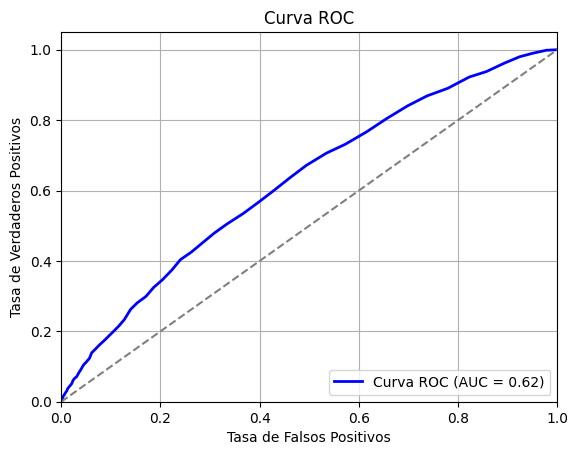

In [125]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [126]:
print(f"La sensibilidad es: {sensibilidad}")
print(f"La precision es: {precision}")
print(f"La f1 es: {f1}")
print(f"El area bajo la curva de roc es: {roc_auc}")

La sensibilidad es: 0.03069838833461243
La precision es: 0.3448275862068966
La f1 es: 0.05637773079633545
El area bajo la curva de roc es: 0.6243425020712883


#### K VECINOS MAS CERCANOS (KNNCLASSIFIER)

In [127]:
X_train = strat_train_set.drop("not.fully.paid", axis=1)
y_train = strat_train_set["not.fully.paid"]

X_test = strat_test_set.drop("not.fully.paid", axis=1)
y_test = strat_test_set["not.fully.paid"]

In [128]:
knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())
knn_clf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('purpose_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['purpose']),
                                                 ('number_transform',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['credit.policy', 'int.rate',
                                                   'installment', 'fico',
                                                   'revol.bal', 'revol.util',
                                                   'inq.last.6mths',
                                                   'pub.rec'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [129]:
knn_clf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

EVALUACION CRUZADA

In [130]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
y_train_knn_pred

array([0, 0, 0, ..., 0, 0, 0])

PRECISION

In [131]:
precision=precision_score(y_train, y_train_knn_pred)
precision

0.2709497206703911

SENSIBILIDAD

In [132]:
sensibilidad=recall_score(y_train, y_train_knn_pred)
sensibilidad

0.07444359171143515

F1

In [133]:
f1=f1_score(y_train, y_train_knn_pred, average="macro")
f1

0.5082309878894308

CURVA DE ROC

In [134]:

y_train_knn_pred = cross_val_predict(
    knn_clf, X_train, y_train, cv=3, method="predict_proba"
)

# Extraer las probabilidades de la clase positiva (columna 1)
y_train_knn_pred_pos = y_train_knn_pred[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_train, y_train_knn_pred_pos)


ÁREA BAJO LA CURVA DE ROC

In [135]:
roc_auc = auc(fpr, tpr)
roc_auc

0.5600949683689427

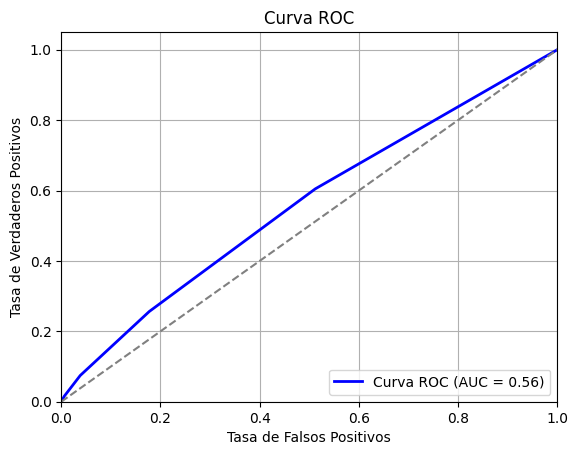

In [136]:
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [137]:
print(f"La sensibilidad es: {sensibilidad}")
print(f"La precision es: {precision}")
print(f"La f1 es: {f1}")
print(f"El area bajo la curva de roc es: {roc_auc}")

La sensibilidad es: 0.07444359171143515
La precision es: 0.2709497206703911
La f1 es: 0.5082309878894308
El area bajo la curva de roc es: 0.5600949683689427


|Regresion logica|
|La sensibilidad es: 0.024558710667689946|
|La precision es: 0.51612903225806451       |
|La f1 es: 0.046886446886446886         |
|El area bajo la curva de roc es: 0.6648295370752176|

Random forest
La sensibilidad es: 0.029930928626247123
La precision es: 0.3333333333333333
La f1 es: 0.054929577464788736
El area bajo la curva de roc es: 0.6183228592329848

SGD
La sensibilidad es: 0.00844205679201842
La precision es: 0.21153846153846154
La f1 es: 0.016236162361623615
El area bajo la curva de roc es: 0.5488129290585746

KKN
La sensibilidad es: 0.07060629316960859
La precision es: 0.2713864306784661
La f1 es: 0.506234150675905
El area bajo la curva de roc es: 0.5690975805153675



### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [138]:
param_grid = [
    {
        # Parámetros para el 'StandardScaler' dentro de 'number_transform'
        "columntransformer__number_transform__standardscaler__with_mean": [True, False],  # Si quieres centrar los datos

        # Parámetros para el 'SimpleImputer' de las columnas numéricas
        "columntransformer__number_transform__simpleimputer__strategy": ['mean', 'median'],

        # Parámetros para el 'SimpleImputer' de las columnas categóricas
        "columntransformer__purpose_transform__simpleimputer__strategy": ['most_frequent', 'constant'],
        
        # Parámetros para el modelo de regresión logística (como la regularización)
        "logisticregression__C": [0.1, 1.0, 10.0],  # Valor de regularización en LogisticRegression
        "logisticregression__max_iter": [100, 200, 300]  # Número de iteraciones
    }
]

log_reg = make_pipeline(preprocessing, LogisticRegression())

# Crear el GridSearchCV con los parámetros que queremos ajustar
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Ver el mejor score obtenido
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

/home/iabd24/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/iabd24/anaconda3/envs/MachineLearning/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Mejores parámetros encontrados: {'columntransformer__number_transform__simpleimputer__strategy': 'mean', 'columntransformer__number_transform__standardscaler__with_mean': True, 'columntransformer__purpose_transform__simpleimputer__strategy': 'most_frequent', 'logisticregression__C': 0.1, 'logisticregression__max_iter': 100}
Mejor puntuación de validación cruzada: 0.8403146943087147


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el conjunto de pruebas con diferentes métricas

Precisión (Accuracy): 0.8392
Precisión (Precision): 0.4737
Recuerdo (Recall): 0.0391
Puntaje F1 (F1 Score): 0.0723
Matriz de Confusión:
[[1197   10]
 [ 221    9]]


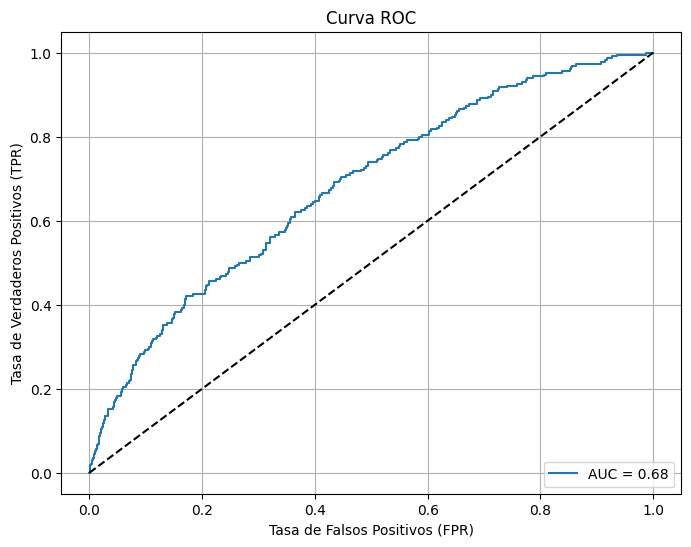

In [139]:
# Predecir sobre el conjunto de pruebas
y_pred = grid_search.best_estimator_.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar los resultados
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Recuerdo (Recall): {recall:.4f}")
print(f"Puntaje F1 (F1 Score): {f1:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(f"Matriz de Confusión:\n{cm}")

# Calcular las probabilidades para las clases
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (1)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
roc_auc = auc(fpr, tpr)


# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal (sin discriminación)
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### PRESENTACIÓN DE LA SOLUCIÓN

Guarda mejor modelo (pipeline de preparación de los datos + modelo) y  haz un script de python que te pida los datos necesarios ('int_rate', 'installment', 'fico',  'revol_bal', 'revol_util', 'inq_last_6mths', 'pub_rec' y 'purpose') y prediga la solución.

In [140]:
# Guardar el mejor modelo (pipeline)
joblib.dump(grid_search.best_estimator_, 'mejor_modelo_prestamos.pkl')
print("El mejor modelo ha sido guardado como 'mejor_modelo.pkl'.")

#Ejecuta el script prediccion_prestamos.py para hacer la prediccion

El mejor modelo ha sido guardado como 'mejor_modelo.pkl'.


## EJERCICIO 2

Vamos a trabajar conun conjunto de datos digits.

Crea un clasificador que nos diga de que número se trata.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [141]:
# Cargar el conjunto de datos
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

#### EXPLORAR LOS DATOS

In [142]:
df = pd.DataFrame(X_digits)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [144]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


#### DIVIDIR LOS DATOS

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

In [146]:
scaler=StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos, evalua los resultados en el conjunto de entrenamiento (exactitud) y calcula la matriz de confusión:
- Regresión logistica
- Maquinas de vectores de sorpote
- Random forest

### REGRESION LOGISTICA

ENTRENAMIENTO

In [147]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled,y_train) 

LogisticRegression(max_iter=1000, random_state=42)

EVALUACION CRUZADA

In [148]:
scores=cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Exactitud media en entrenamiento: {np.mean(scores):.4f}")

Exactitud media en entrenamiento: 0.9617


MATRIZ DE CONFUSION

In [149]:
y_train_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[144,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 144,   0,   2,   0,   1,   1,   0,   4,   2],
       [  0,   1, 142,   1,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 144,   0,   0,   0,   0,   3,   2],
       [  0,   1,   0,   0, 127,   0,   0,   2,   3,   2],
       [  0,   1,   0,   0,   1, 130,   0,   0,   0,   3],
       [  0,   1,   0,   0,   1,   0, 143,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 143,   1,   0],
       [  1,   7,   2,   1,   1,   0,   0,   0, 132,   0],
       [  0,   2,   0,   0,   0,   2,   0,   2,   1, 133]])

### MAQUINA DE VECTORES DE SOPORTE

ENTRENAMIENTO

In [150]:
svc_mod=SVC(random_state=42)
svc_mod.fit(X_train_scaled,y_train)

SVC(random_state=42)

EVALUACION CRUZADA

In [151]:
scores=cross_val_score(svc_mod, X_train_scaled, y_train, cv=5, scoring="accuracy")
print(f"Exactitud media en entrenamiento: {np.mean(scores):.4f}")

Exactitud media en entrenamiento: 0.9770


MATRIZ CONFUSION

In [152]:
y_train_pred = cross_val_predict(svc_mod, X_train_scaled, y_train, cv=5)
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[145,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 153,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0, 140,   0,   3,   0,   0,   1,   0,   0],
       [  0,   0,   0, 145,   1,   0,   0,   0,   3,   0],
       [  0,   0,   0,   0, 130,   0,   0,   2,   2,   1],
       [  0,   0,   0,   0,   1, 133,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 146,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 143,   0,   0],
       [  0,   3,   0,   1,   1,   0,   0,   0, 137,   2],
       [  0,   1,   0,   1,   0,   2,   1,   2,   1, 132]])

### RANDOM FOREST CLASSIFIER

ENTRENAMIENTO

In [153]:
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

EVALUACION CRUZADA

In [154]:
scores=cross_val_score(forest_clf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Exactitud media en entrenamiento: {np.mean(scores):.4f}")

Exactitud media en entrenamiento: 0.9736


MATRIZ DE CONFUSION

In [155]:
y_pred = forest_clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 39]])

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [156]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],  # Solo kernel lineal
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerancia para la convergencia
}

# Crear el clasificador SVM
svm = SVC(random_state=42)

# Configurar la búsqueda exhaustiva (GridSearchCV)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train)

# Ver los mejores parámetros encontrados
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

Mejores parámetros encontrados: {'C': 0.1, 'kernel': 'linear', 'tol': 0.0001}


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

In [157]:
# Evaluar el modelo optimizado en el conjunto de prueba
best_model = grid_search.best_estimator_  # Modelo con los mejores parámetros encontrados
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo optimizado: {accuracy:.4f}")

# Imprimir el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo optimizado: 0.8333
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.55      1.00      0.71        28
           2       0.97      1.00      0.99        33
           3       1.00      0.94      0.97        34
           4       1.00      0.33      0.49        46
           5       0.82      0.96      0.88        47
           6       0.70      1.00      0.82        35
           7       1.00      0.82      0.90        34
           8       0.67      0.67      0.67        30
           9       0.97      0.78      0.86        40

    accuracy                           0.83       360
   macro avg       0.87      0.85      0.83       360
weighted avg       0.88      0.83      0.82       360



### PRESENTACIÓN DE LA SOLUCIÓN

Simplemente guarda el modelo

In [158]:
# Guardar el mejor modelo (pipeline)
joblib.dump(grid_search.best_estimator_, 'mejor_modelo.pkl')
print("El mejor modelo ha sido guardado como 'mejor_modelo.pkl'.")

El mejor modelo ha sido guardado como 'mejor_modelo.pkl'.


## EJERCICIO 3

Vamos a trabajar con un conjunto de datos donde cada instancia (en este caso, cada película) pueda tener múltiples etiquetas (géneros en este caso).

Tienes los datos en el fichero tmdb_5000_movies.csv

Crea un clasificador que te diga los generos que le corresponden a cada película.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [174]:
# Cargar los datos
data = pd.read_csv("datos/tmdb_5000_movies.csv")

# Preprocesamiento de datos
# Transformar géneros en listas de palabras separadas
data["genres"] = data["genres"].apply(lambda x: [genre["name"] for genre in eval(x)])

# Dividir los datos en características (X) y etiquetas (y)
X = data["overview"]
y = data["genres"]

X = X.dropna()
y = y[X.index]

#### EXPLORAR LOS DATOS

In [175]:
df_x=pd.DataFrame(X)
df_x

,overview
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."
...,...
4798,El Mariachi just wants to play his guitar and ...
4799,A newlywed couple's honeymoon is upended by th...
4800,"""Signed, Sealed, Delivered"" introduces a dedic..."
4801,When ambitious New York attorney Sam is sent t...


In [176]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  4800 non-null   object
dtypes: object(1)
memory usage: 75.0+ KB


In [177]:
df_y=pd.DataFrame(y)
df_y

,genres
0,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[Adventure, Fantasy, Action]"
2,"[Action, Adventure, Crime]"
3,"[Action, Crime, Drama, Thriller]"
4,"[Action, Adventure, Science Fiction]"
...,...
4798,"[Action, Crime, Thriller]"
4799,"[Comedy, Romance]"
4800,"[Comedy, Drama, Romance, TV Movie]"
4801,[]


In [178]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   genres  4800 non-null   object
dtypes: object(1)
memory usage: 75.0+ KB


#### DIVIDIR LOS DATOS

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### PREPARAR LOS DATOS

Tienes aquí las transformaciones que hay que hacer a los datos pero busca en internet que estamos haciendo exactamente y explicalo (igual hay que hacer algo con los datos que faltan)

TfidfVectorizer(): Esta es una transformación que convierte los datos de texto (en este caso, las descripciones de las películas en la columna overview) en un formato numérico que puede ser utilizado por los modelos de machine learning.

MultiLabelBinarizer(): Esto transforma las etiquetas (géneros en este caso) de cada película en un formato binario adecuado para clasificación múltiple, ya que cada película puede pertenecer a varios géneros.

In [206]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

mlb = MultiLabelBinarizer()
y_train_transformed = mlb.fit_transform(y_train)


In [207]:
y_test_transformed = mlb.transform(y_test)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea un modelo Random Forest y evalúa el modelo en el conjunto de entrenamiento (accuracy), no hace falta usar validación cruzada.

In [208]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
rf_model.fit(X_train_tfidf, y_train_transformed)

# Hacer predicciones en el conjunto de entrenamiento
y_train_pred = rf_model.predict(X_train_tfidf)

# Evaluar el modelo con accuracy en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train_transformed, y_train_pred)

# Imprimir la precisión (accuracy)
print(f'Accuracy en el conjunto de entrenamiento: {train_accuracy:.4f}')

Accuracy en el conjunto de entrenamiento: 0.9997


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el modelo en el conjuno de prueba y muestra las primeras 25 predicciones y sus correspondientes valores reales (con texto, para lo cual tendras que aplicar mlb.inverse_transform a las predicciones).

¿Qué puedes deducir del resultado?

In [209]:
# Hacer predicciones en el conjunto de prueba
y_test_pred = rf_model.predict(X_test_tfidf)

# Convertir las predicciones a los géneros originales
y_test_pred_labels = mlb.inverse_transform(y_test_pred)

# Convertir las etiquetas reales a los géneros originales
y_test_labels = mlb.inverse_transform(y_test_transformed)


In [210]:
# Mostrar las primeras 25 predicciones y valores reales
for i in range(25):
    print(f"Película {i+1}:")
    print(f"Predicciones: {', '.join(y_test_pred_labels[i]) if y_test_pred_labels[i] else 'Ningún género predicho'}")
    print(f"Real: {', '.join(y_test_labels[i]) if y_test_labels[i] else 'Ningún género real'}")
    print("-" * 50)

Película 1:
Predicciones: Ningún género predicho
Real: Action, Adventure, Comedy, Thriller
--------------------------------------------------
Película 2:
Predicciones: Comedy
Real: Comedy
--------------------------------------------------
Película 3:
Predicciones: Comedy
Real: Comedy, Family
--------------------------------------------------
Película 4:
Predicciones: Ningún género predicho
Real: Drama
--------------------------------------------------
Película 5:
Predicciones: Drama
Real: Adventure, Family, Fantasy
--------------------------------------------------
Película 6:
Predicciones: Ningún género predicho
Real: Action, Adventure, Science Fiction
--------------------------------------------------
Película 7:
Predicciones: Ningún género predicho
Real: Action, Science Fiction, Thriller
--------------------------------------------------
Película 8:
Predicciones: Ningún género predicho
Real: Comedy, Romance
--------------------------------------------------
Película 9:
Predicciones:

Podemos ver que si la pelicula tiene varios generos, el modelo no es capaz de predecir ningun genero por lo que puede que el modelo este sobreajustado.
Parece ser que el modelo si que puede predecir los generos como Comedy o Drama y seguramente sea porque en los datos entrenamiento haya muchas peliculas que tengan ese genero y el modelo este sobreajustado a esos generos y por eso no sabe predecir el resto de generos.
En las peliculas que tienen un solo genero suele acertar pero seguramente sea por el sobreajuste.